In [249]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [250]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [251]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_OPEN_KEY = os.getenv('PLAID_OPEN_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')


# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [252]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, 
                      secret=PLAID_SECRET, 
                      public_key=PLAID_OPEN_KEY, 
                      environment='sandbox')

INSTITUTION_ID = "ins_109508"

In [253]:
apikey = 'PLAID_CLIENT_ID'

api_request = 'https://www.plaid.com/api/'

### 2. Generate a public token

In [254]:
# YOUR CODE HERE
create_open_token = client.Sandbox.public_token.create(INSTITUTION_ID,['transactions','income','assets'])
client.Institutions.get(1)

{'institutions': [{'country_codes': ['CA'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Access Code (PAC)', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_118841',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': 'Access Credit Union - Online Banking',
   'products': ['assets', 'balance', 'transactions', 'income', 'identity'],
   'routing_numbers': []}],
 'request_id': 'F6KsB4VM9bEzSjF',
 'total': 11416}

### 3. Exchange the public token for an access token

In [255]:
exchange_token = client.Item.public_token.exchange(create_open_token['public_token'])


### 4. Fetch Accounts

In [256]:
client.Institutions.get(1)

{'institutions': [{'country_codes': ['CA'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Access Code (PAC)', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_118841',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': 'Access Credit Union - Online Banking',
   'products': ['assets', 'balance', 'transactions', 'income', 'identity'],
   'routing_numbers': []}],
 'request_id': 'WIaqNrfdpOOEYTD',
 'total': 11416}

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [257]:
access_token = exchange_token['access_token']
client.Accounts.get(access_token)

# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)


print(json.dumps(transaction_response['transactions'][:1],indent=4, sort_keys=True))

[
    {
        "account_id": "pvRP68V8LxFeZxjEAndwSKwrQxxbLGULr5mw8",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-01-31",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pendi

### 2. Print the categories for each transaction

In [258]:


for transaction in (transaction_response['transactions']):
    print(transaction)
    

{'account_id': 'pvRP68V8LxFeZxjEAndwSKwrQxxbLGULr5mw8', 'account_owner': None, 'amount': 500, 'authorized_date': None, 'category': ['Travel', 'Airlines and Aviation Services'], 'category_id': '22001000', 'date': '2020-01-31', 'iso_currency_code': 'USD', 'location': {'address': None, 'city': None, 'country': None, 'lat': None, 'lon': None, 'postal_code': None, 'region': None, 'store_number': None}, 'name': 'United Airlines', 'payment_channel': 'in store', 'payment_meta': {'by_order_of': None, 'payee': None, 'payer': None, 'payment_method': None, 'payment_processor': None, 'ppd_id': None, 'reason': None, 'reference_number': None}, 'pending': False, 'pending_transaction_id': None, 'transaction_id': 'jvmJRMVMZqF5zq89ejmKSwK8Nb8AREH1MQ8L5', 'transaction_type': 'special', 'unofficial_currency_code': None}
{'account_id': 'MJNjneMew3C6bLm93yBeFqWJ6ww983f9lQZKN', 'account_owner': None, 'amount': 6.33, 'authorized_date': None, 'category': ['Travel', 'Taxi'], 'category_id': '22016000', 'date': '2

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [259]:
transaction_df= pd.DataFrame(columns=['Date','Name','Amount','Category'])
date=[]
name=[]
amount=[]
category=[]
for i in transactions:
    date.append(i['date'])
    name.append(i['name'])
    amount.append(i['amount'])
    category.append(i['category'][0])
transaction_df['Date']=date
transaction_df['Name']=name
transaction_df['Amount']=amount
transaction_df['Category']=category
transaction_df.head()

,Date,Name,Amount,Category
0,2020-01-31,United Airlines,500.00,Travel
1,2020-01-29,Uber,6.33,Travel
2,2020-01-26,Tectra Inc,500.00,Food and Drink
3,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2020-01-25,KFC,500.00,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [260]:
transaction_df['Date'] = pd.to_datetime(transaction_df['Date'])
pd.to_numeric(transaction_df['Amount'])
transaction_df.dtypes
transaction_df.head()

,Date,Name,Amount,Category
0,2020-01-31,United Airlines,500.00,Travel
1,2020-01-29,Uber,6.33,Travel
2,2020-01-26,Tectra Inc,500.00,Food and Drink
3,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2020-01-25,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [261]:
prev_year_gi = client.Income.get(access_token)
prev_year_gi

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': '0OQx86BSL6wPMfa'}

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4AEADC348>],
      dtype=object)

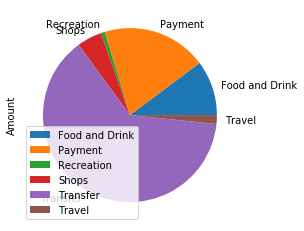

In [262]:
transaction_df.groupby('Category').sum()
transaction_df.groupby('Category').sum().plot(kind='pie',subplots=True)


### Calculate the expenses per month

In [263]:
#Generate a bar chart with the number of transactions for each category 
transaction_df.groupby('Category').sum()

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,535.19


In [264]:
transaction_df.groupby(['Category','Date']).sum()

Amount
Category       Date               
Food and Drink 2019-11-13    89.40
               2019-11-14    16.33
               2019-11-26   500.00
               2019-11-27   500.00
               2019-12-13    89.40
               2019-12-14    16.33
               2019-12-26   500.00
               2019-12-27   500.00
               2020-01-12    89.40
               2020-01-13    16.33
               2020-01-25   500.00
               2020-01-26   500.00
Payment        2019-11-17    25.00
               2019-11-26  2078.50
               2019-12-17    25.00
               2019-12-26  2078.50
               2020-01-16    25.00
               2020-01-25  2078.50
Recreation     2019-11-15    78.50
               2019-12-15    78.50
               2020-01-14    78.50
Shops          2019-11-26   500.00
               2019-12-26   500.00
               2020-01-25   500.00
Transfer       2019-11-12    -4.22
               2019-11-16  6850.00
               2019-12-12    -4.22
               2019-12-16  6850.00
               2020-01-11    -4.22
               2020-01-15  6850.00
Travel         2019-11-02   500.00
               2019-11-15  -500.00
               2019-11-17     5.40
               2019-11-30     6.33
               2019-12-02   500.00
               2019-12-15  -500.00
               2019-12-17     5.40
               2019-12-30     6.33
               2020-01-01   500.00
               2020-01-14  -500.00
               2020-01-16     5.40
               2020-01-29     6.33
               2020-01-31   500.00

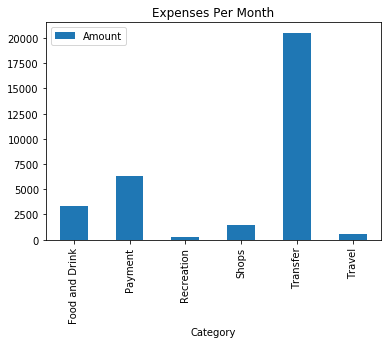

In [265]:
#Plot the total expenses per month
transaction_df.groupby(['Category']).sum().plot(kind='bar',title="Expenses Per Month")